In [39]:
from preprocessing import load_data
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
data = load_data()

In [4]:
cuisine_ingredients = {i['cuisine']:[] for i in data}
for dp in data:
    cuisine_ingredients[dp['cuisine']]+=dp['ingredients']

In [29]:
overlap = np.intersect1d(list(set(cuisine_ingredients['greek'])),
                         list(set(cuisine_ingredients['greek']))
                        )

In [30]:
len(overlap)

1198

In [31]:
len(set(cuisine_ingredients['greek']))

1198

In [22]:
len(set(cuisine_ingredients['indian']))

1664

In [17]:
len(overlap)/len(set(cuisine_ingredients['greek']))

0.5984974958263773

In [100]:
def min_max(values):
    return [(v-min(values))/(max(values)-min(values)) for v in values]
    

In [73]:
overlaps = defaultdict(dict)
jaccard = defaultdict(dict)
for cuisine,ingredients in tqdm(cuisine_ingredients.items()):
    for cuisine_2,ingredients_2 in cuisine_ingredients.items():
        if cuisine==cuisine_2:
            continue
        overlap = np.intersect1d(list(set(ingredients)),
                             list(set(ingredients_2))
                            )
        
        union = np.union1d(list(set(ingredients)),
                             list(set(ingredients_2))
                            )
        overlaps[cuisine][cuisine_2] = len(overlap)/len(set(ingredients))
        overlaps[cuisine_2][cuisine] = len(overlap)/len(set(ingredients_2))
        
        
        jaccard[cuisine][cuisine_2] = len(overlap)/len(union)
        jaccard[cuisine_2][cuisine] = len(overlap)/len(union)
    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.55it/s]


In [58]:
overlaps

defaultdict(dict,
            {'greek': {'greek': 1.0,
              'southern_us': 0.29603399433427763,
              'filipino': 0.24131944444444445,
              'indian': 0.33426573426573425,
              'jamaican': 0.2816553428042001,
              'spanish': 0.3725599553820413,
              'italian': 0.31600765306122447,
              'mexican': 0.294431477159053,
              'chinese': 0.26480541455160744,
              'british': 0.28269126424308194,
              'thai': 0.287,
              'vietnamese': 0.24716062736614386,
              'cajun_creole': 0.3342953342953343,
              'brazilian': 0.26761433868974044,
              'french': 0.3431013431013431,
              'japanese': 0.2611190817790531,
              'irish': 0.2900763358778626,
              'korean': 0.23657817109144544,
              'moroccan': 0.39768339768339767,
              'russian': 0.3068181818181818},
             'southern_us': {'greek': 0.29603399433427763,
              'southern_

In [112]:
jaccard_min_maxed = {}
for k,v in jaccard.items():
    mm = min_max(list(v.values()))
    jaccard_min_maxed[k]={}
    for idx,val in enumerate(mm):
        jaccard_min_maxed[k][list(v.keys())[idx]] = val

In [122]:
G = nx.DiGraph()
for k,v in jaccard_min_maxed.items():
    for v2,w in v.items():
        if k==v2:
            continue
        G.add_edges_from([(v2,k,{'weight':w})])


    

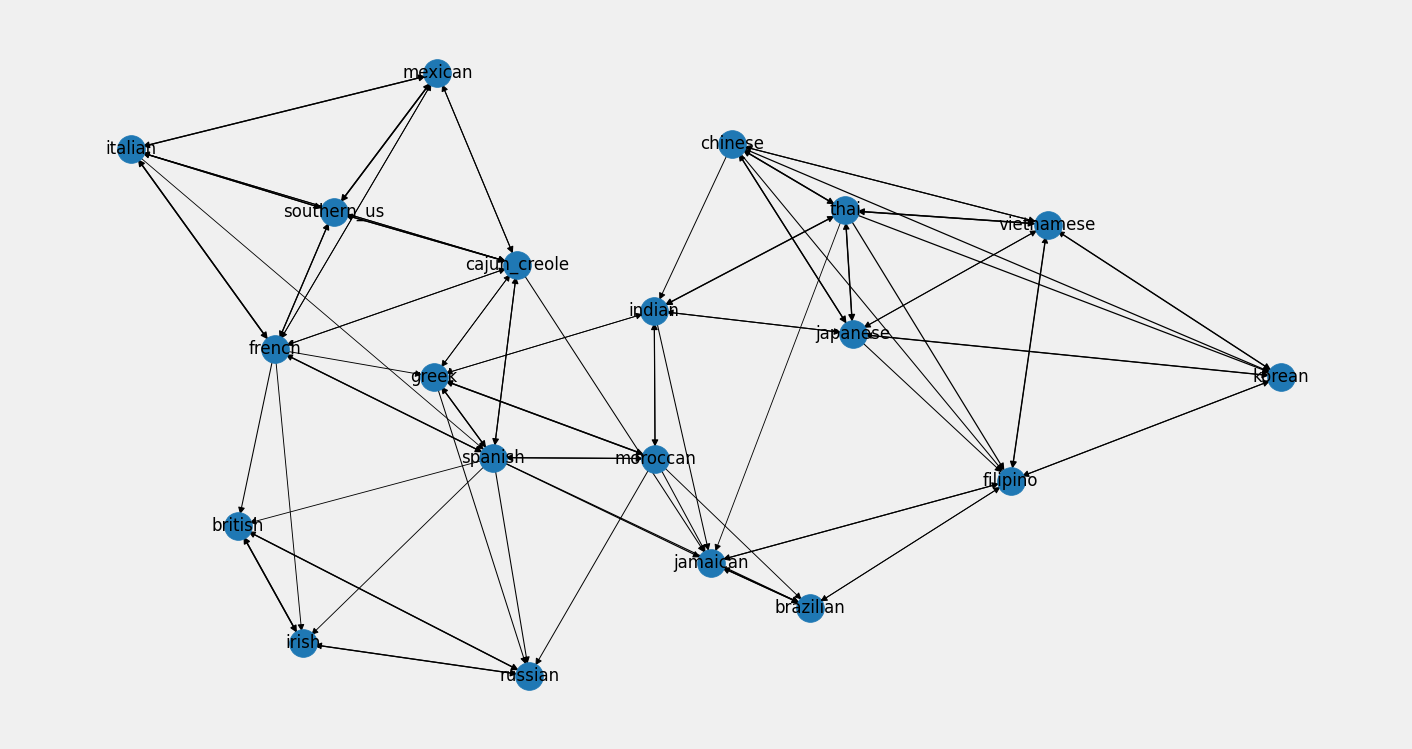

In [127]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
plt.figure(figsize=[16,9])
pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=400)


temp = [(u,v,data['weight']) for u,v,data in G.edges(data=True) if data['weight']>0.6]
elist = [(i[0],i[1]) for i in temp]
weights = [i[-1] for i in temp]
# edges
nx.draw_networkx_edges(G, pos, edgelist=elist, width=weights)


# node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif",font_color='black')
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels)

#ax = plt.gca()
#ax.margins(0.08)
plt.axis("off")
#plt.tight_layout()
plt.show()

In [105]:
def plot_cuisines(cuisine,overlaps=overlaps,jaccard=jaccard):
    
    jaccard = {k: v for k, v in sorted(jaccard[cuisine].items(), key=lambda item: item[1],reverse=True)}

    plt.figure(figsize=[16,9])
    plt.xticks(rotation = 45)
    plt.bar(jaccard.keys(),min_max(list(jaccard.values())))
    plt.show()

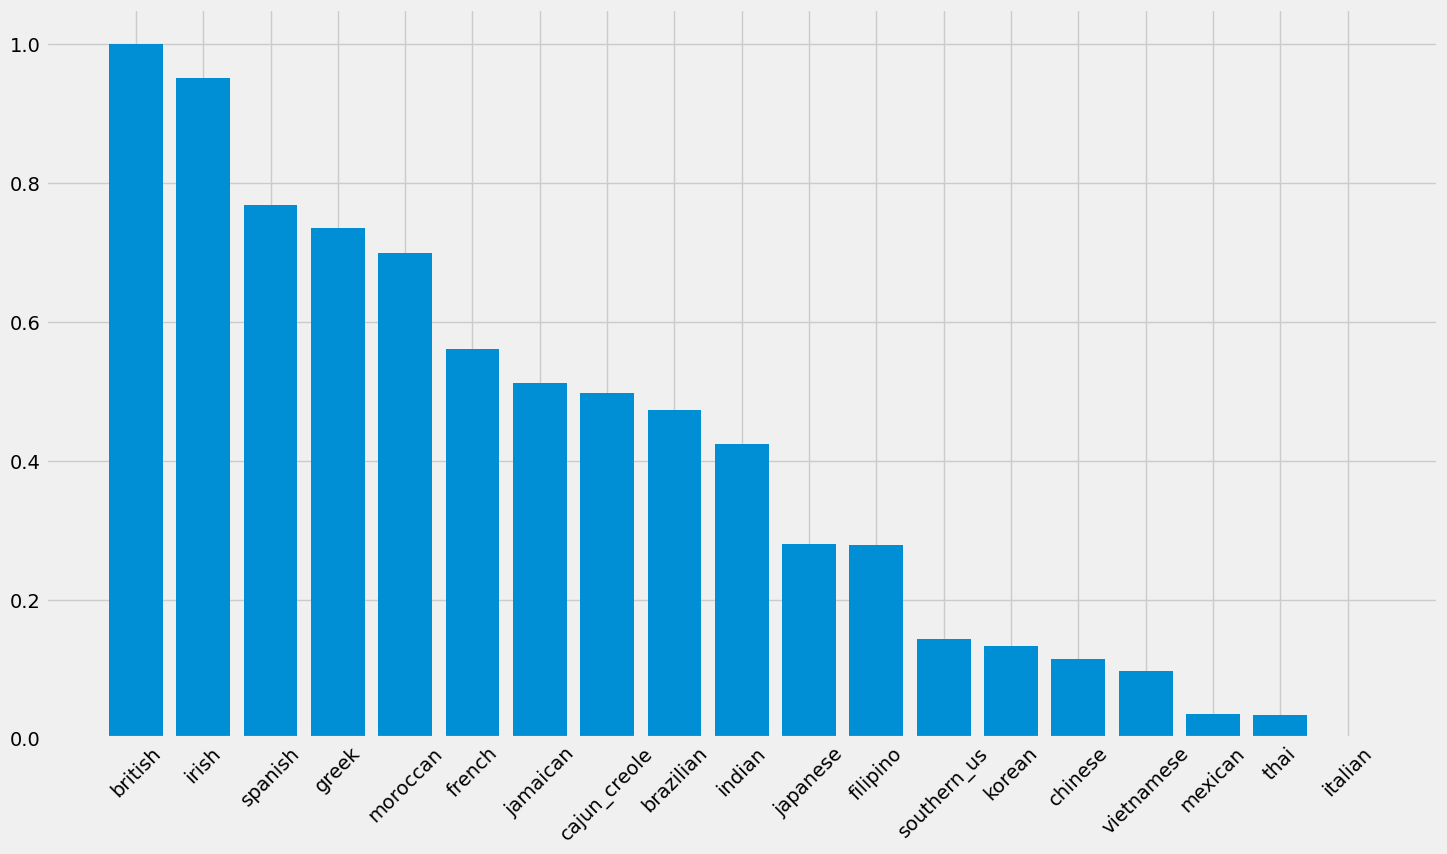

In [129]:
plot_cuisines('russian')